In [1]:
# set up
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import pairwise_distances

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
def is_sad(rgb_pixel, threshhold=10):
    R, G, B = map(int, rgb_pixel)
    diff1 = np.abs(R - G)
    diff2 = np.abs(G - B)
    diff3 = np.abs(R - B)
    return  diff1 < threshhold \
            and diff2 < threshhold \
            and diff3 < threshhold

In [155]:
def make_happy(img, threshhold=10):
    img_arr = np.array(img)
    width = img_arr.shape[1]
    data = img_arr.reshape(-1, img_arr.shape[-1])
    happy = [np.array([i / width, i % width]) for i, pixel in enumerate(data) if not is_sad(pixel, threshhold)]
    sad = [np.array([i / width, i % width]) for i, pixel in enumerate(data) if is_sad(pixel, threshhold)]
 
    happy_ind = [i for i, pixel in enumerate(data) if not is_sad(pixel, threshhold)]
    sad_ind = [i for i, pixel in enumerate(data) if is_sad(pixel, threshhold)]
    
    happy, sad = np.array(happy, dtype=np.float64), np.array(sad, dtype=np.float64)
    happy_ind, sad_ind = np.array(happy_ind, dtype=np.int32), np.array(sad_ind, dtype=np.int32)
    
    dist = pairwise_distances(happy, sad)
    best = np.argmin(dist, axis=0)


    for i in range(len(sad_ind)):
        data[sad_ind[i]] = data[best[i]]

    return data.reshape(img_arr.shape)


def mark_grey(img, threshhold=10):
    img_arr = np.array(img)
    X = img_arr.reshape(-1, img_arr.shape[-1])
    for i, pixel in enumerate(X):
        if is_sad(pixel, threshhold):
            X[i] = np.array([255, 0, 0])
    return X.reshape(img_arr.shape)


def make_sad(img, threshhold=10):
    img_arr = np.array(img)
    X = img_arr.reshape(-1, img_arr.shape[-1])
    
    for i, pixel in enumerate(X):
        if not is_sad(pixel, threshhold):
            R, G, B = map(int, pixel)
            avg = (0.3 * R) + (0.59 * G) + (0.11 * B)
            X[i] = np.array([avg, avg, avg])
            
    return X.reshape(img_arr.shape)

In [148]:
def show_images(img, threshhold=10):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,12))
    sad_image = make_sad(img, threshhold)
    grey_image = mark_grey(img, threshhold)
    happy_image = make_happy(img, threshhold)
    
    ax1.imshow(img)
    ax1.set_title('Original Image')
    
    ax2.imshow(grey_image)
    ax2.set_title(f'Mark greys')
    
    ax3.imshow(sad_image)
    ax3.set_title(f'Sad image')
    
    ax4.imshow(happy_image)
    ax4.set_title(f'Happy image')

In [160]:
Images = [Image.open('Images/1.jpg'),
          Image.open('Images/2.jpg'),
          Image.open('Images/3.jpg'),
          Image.open('Images/4.jpg'),
          Image.open('Images/5.jpg'),
          Image.open('Images/6.jpg'),
         ]  

Marking grey colours: 100%|██████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.45s/it]


Wall time: 8.73 s


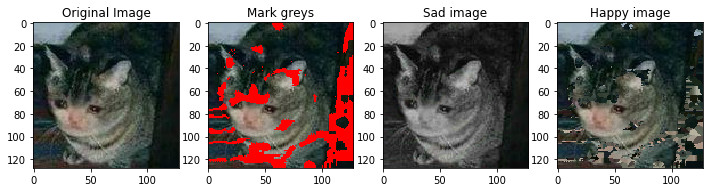

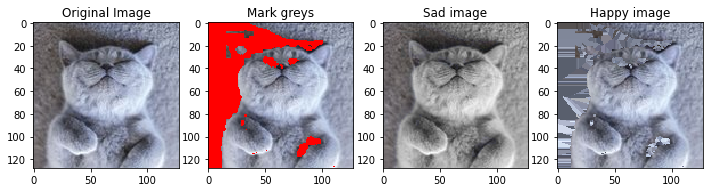

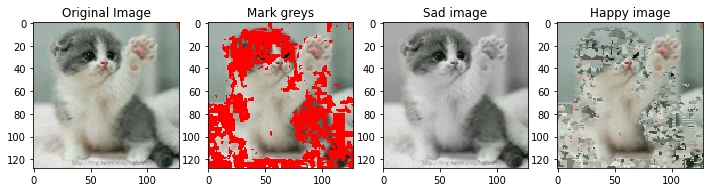

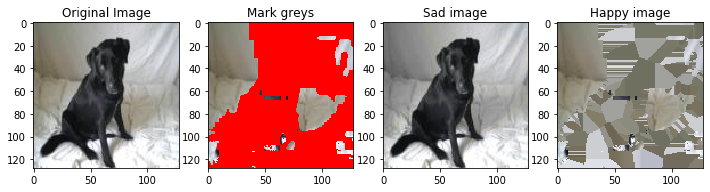

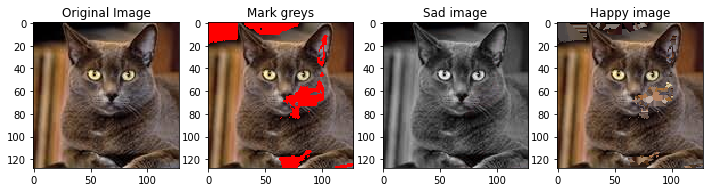

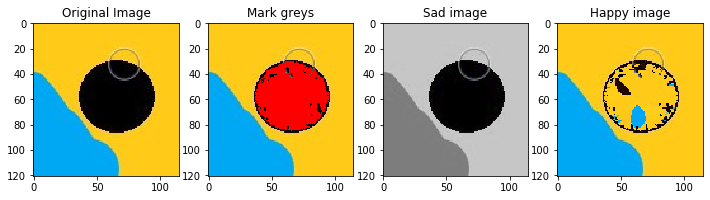

In [161]:
%%time
for img in tqdm(Images, desc='Marking grey colours', position=0, leave=True):
    show_images(img, threshhold=10)